# Data Analyst au sein de la FAO

lien du brief : https://simplonline.co/briefs/688fc302-e4d4-4324-8904-f22316c31713



lien du dossier git : https://github.com/data-IA-2023/Groupe-3


Vous venez d'intégrer la FAO (Food and Agriculture Organization of the United Nations). BRAVO !!!!!!
Vous allez mener votre première mission en analysant les données mondiales de production agricole, d'alimentation et de nutrition.

**Livrables**

* Un dépôt Github
* Un notebook **fonctionnel, documenté et commenté**
* Une présentation écrite et orale résumant vos travaux, votre analyse et vos recommandations

**Contexte du projet**

* Au sein du service Data Analytics and Prospective de la FAO, vous êtes en charge d'analyser les données produites par les Nations Unies.

* Ces analyses conduisent à des rapports de synthèse à destination des décideurs.

* Pour êtes également en charge de la partie Prospective, c'est à dire donner des tendances et des évolutions probables quant à la production agricole, à l'alimentation et la nutrition mondiales.


**Ressource(s)**

FAO - Wikipedia : https://fr.wikipedia.org/wiki/Organisation_des_Nations_unies_pour_l'alimentation_et_l'agriculture

FAOSTAT : https://www.fao.org/faostat/fr/#home

Les données FAO 2013 : https://github.com/remijul/dataset/tree/master/fao_2013

## Partie extraction des données

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [172]:
#Chargement des données avec définition de l'index et changement des types des  dimensions
url_bd="https://github.com/remijul/dataset/raw/4156ed0c38c1f5e81b3bf8e6458a245c5fa6c35a/"
url_bd=""
chemein_BD_vegetal = url_bd+"fao_2013/FAOSTAT_2013_vegetal.csv"
FAOSTAT_2013_vegetal = pd.read_csv(chemein_BD_vegetal, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Année':str, 'Code Année':str})

FAOSTAT_2013_vegetal.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées
2,FBS,Bilans Alimentaires,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées
3,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées
4,FBS,Bilans Alimentaires,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées


In [173]:
FAOSTAT_2013_vegetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104871 entries, 0 to 104870
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            104871 non-null  object 
 1   Domaine                 104871 non-null  object 
 2   Code Pays               104871 non-null  object 
 3   Pays                    104871 non-null  object 
 4   Code Élément            104871 non-null  object 
 5   Élément                 104871 non-null  object 
 6   Code Produit            104871 non-null  object 
 7   Produit                 104871 non-null  object 
 8   Code Année              104871 non-null  object 
 9   Année                   104871 non-null  object 
 10  Unité                   104871 non-null  object 
 11  Valeur                  104871 non-null  float64
 12  Symbole                 104871 non-null  object 
 13  Description du Symbole  104871 non-null  object 
dtypes: float64(1), objec

In [174]:

#Chargement des données avec définition de l'index et changement des types des  dimensions
chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_animal.csv"
FAOSTAT_2013_animal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Code année':str, 'Année':str})

FAOSTAT_2013_animal.head()




,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée


In [175]:
FAOSTAT_2013_animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37166 entries, 0 to 37165
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            37166 non-null  object 
 1   Domaine                 37166 non-null  object 
 2   Code Pays               37166 non-null  object 
 3   Pays                    37166 non-null  object 
 4   Code Élément            37166 non-null  object 
 5   Élément                 37166 non-null  object 
 6   Code Produit            37166 non-null  object 
 7   Produit                 37166 non-null  object 
 8   Code Année              37166 non-null  int64  
 9   Année                   37166 non-null  object 
 10  Unité                   37166 non-null  object 
 11  Valeur                  37166 non-null  float64
 12  Symbole                 37166 non-null  object 
 13  Description du Symbole  37166 non-null  object 
dtypes: float64(1), int64(1), object(12)
me

In [176]:

#Chargement des données avec définition de l'index et changement des types des  dimensions
chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_cereal.csv"
FAOSTAT_2013_cereal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit': str,'Code Année': str,'Année': str})

FAOSTAT_2013_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            16057 non-null  object 
 1   Domaine                 16057 non-null  object 
 2   Code Pays               16057 non-null  object 
 3   Pays                    16057 non-null  object 
 4   Code Élément            16057 non-null  object 
 5   Élément                 16057 non-null  object 
 6   Code Produit            16057 non-null  object 
 7   Produit                 16057 non-null  object 
 8   Code Année              16057 non-null  object 
 9   Année                   16057 non-null  object 
 10  Unité                   16057 non-null  object 
 11  Valeur                  16057 non-null  float64
 12  Symbole                 16057 non-null  object 
 13  Description du Symbole  16057 non-null  object 
dtypes: float64(1), object(13)
memory usage

In [177]:
chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_population.csv"
FAOSTAT_2013_population = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Country Code': str,'Element Code': str,'Item Code': str,'Year Code': str,'Year': str})

FAOSTAT_2013_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       175 non-null    object
 1   Domain            175 non-null    object
 2   Country Code      175 non-null    object
 3   Country           175 non-null    object
 4   Element Code      175 non-null    object
 5   Element           175 non-null    object
 6   Item Code         175 non-null    object
 7   Item              175 non-null    object
 8   Year Code         175 non-null    object
 9   Year              175 non-null    object
 10  Unit              175 non-null    object
 11  Value             175 non-null    int64 
 12  Flag              1 non-null      object
 13  Flag Description  175 non-null    object
dtypes: int64(1), object(13)
memory usage: 19.3+ KB


In [178]:
chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_sous_alimentation.csv"
FAOSTAT_2013_sous_alimentation = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code zone': str,'Code Élément': str,'Code Produit': str,'Code année': str,'Année': str})

FAOSTAT_2013_sous_alimentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            204 non-null    object 
 1   Domaine                 204 non-null    object 
 2   Code zone               204 non-null    object 
 3   Zone                    204 non-null    object 
 4   Code Élément            204 non-null    object 
 5   Élément                 204 non-null    object 
 6   Code Produit            204 non-null    object 
 7   Produit                 204 non-null    object 
 8   Code année              204 non-null    object 
 9   Année                   204 non-null    object 
 10  Unité                   204 non-null    object 
 11  Valeur                  97 non-null     float64
 12  Symbole                 204 non-null    object 
 13  Description du Symbole  204 non-null    object 
dtypes: float64(1), object(13)
memory usage: 22

## Partie netoyage des données

In [179]:

#Supprimer les lignes ou il y n'a pas de valeurs

nan_number=3
FAOSTAT_2013_animal.dropna(thresh=nan_number, inplace=True)
FAOSTAT_2013_cereal.dropna(thresh=nan_number, inplace=True)
FAOSTAT_2013_population.dropna(thresh=nan_number, inplace=True)
FAOSTAT_2013_sous_alimentation.dropna(thresh=nan_number, inplace=True)
FAOSTAT_2013_vegetal.dropna(thresh=nan_number, inplace=True)

In [180]:
#supprimer les lignes doublantes

FAOSTAT_2013_animal.drop_duplicates(inplace=True)
FAOSTAT_2013_cereal.drop_duplicates(inplace=True)
FAOSTAT_2013_population.drop_duplicates(inplace=True)
FAOSTAT_2013_sous_alimentation.drop_duplicates(inplace=True)
FAOSTAT_2013_vegetal.drop_duplicates(inplace=True)

In [181]:
#Supprimer les agrégats

FAOSTAT_2013_animal.drop(FAOSTAT_2013_animal[FAOSTAT_2013_animal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_cereal.drop(FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
FAOSTAT_2013_sous_alimentation.drop(FAOSTAT_2013_sous_alimentation[FAOSTAT_2013_sous_alimentation['Zone']=='Chine'].index, inplace=True)
FAOSTAT_2013_vegetal.drop(FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Symbole']=='A'].index, inplace=True)






## Partie traitement des données

Il s’agit ici de réaliser des analyses descriptives statistiques et graphiques sur les différentes variables des jeux de données :

    • Analyses univariées
    • Analyses bi-variées
    • Analyses multi-variées

Réaliser également des analyses exploratoires sur les différentes variables

 • Analyses univariées

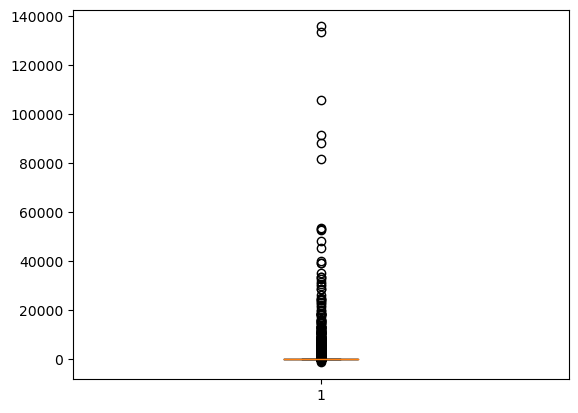

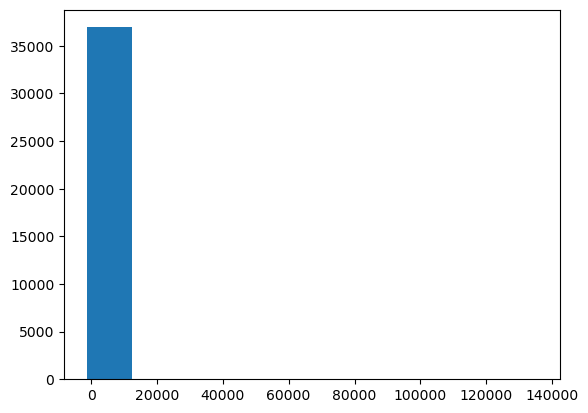

In [182]:
plt.boxplot(FAOSTAT_2013_animal['Valeur'])
plt.show()
plt.hist(FAOSTAT_2013_animal['Valeur'])
plt.show()

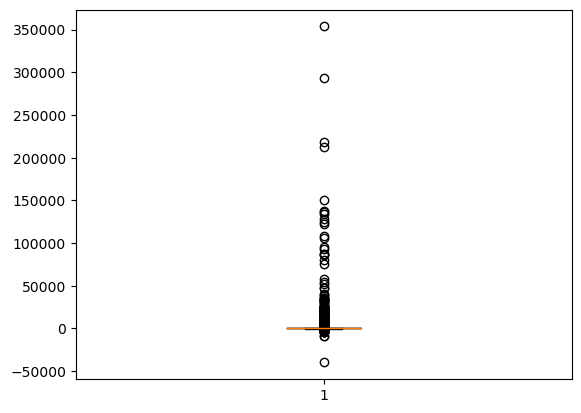

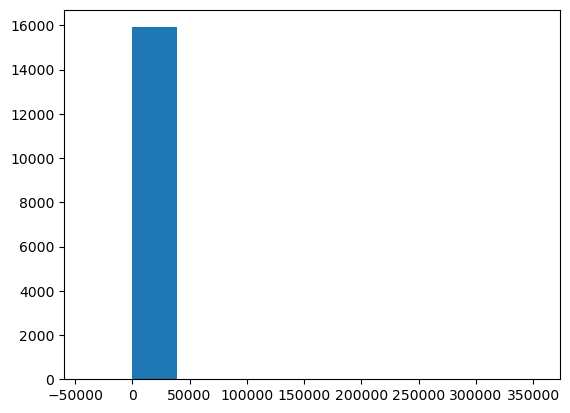

In [183]:
plt.boxplot(FAOSTAT_2013_cereal['Valeur'])
plt.show()
plt.hist(FAOSTAT_2013_cereal['Valeur'])
plt.show()

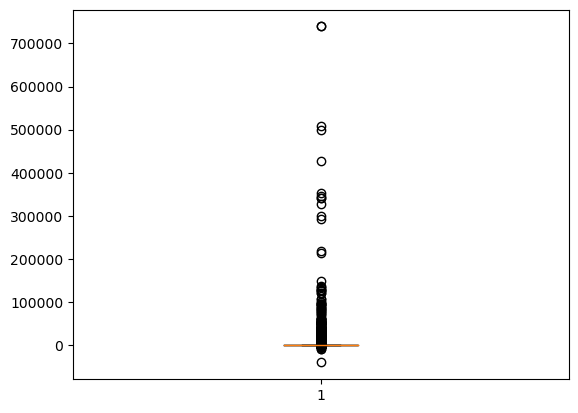

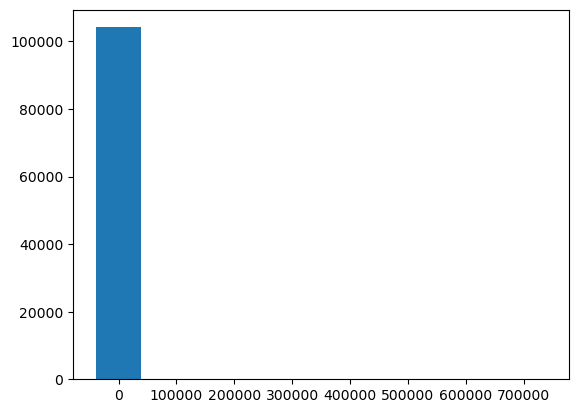

In [184]:
plt.boxplot(FAOSTAT_2013_vegetal['Valeur'])
plt.show()
plt.hist(FAOSTAT_2013_vegetal['Valeur'])
plt.show()

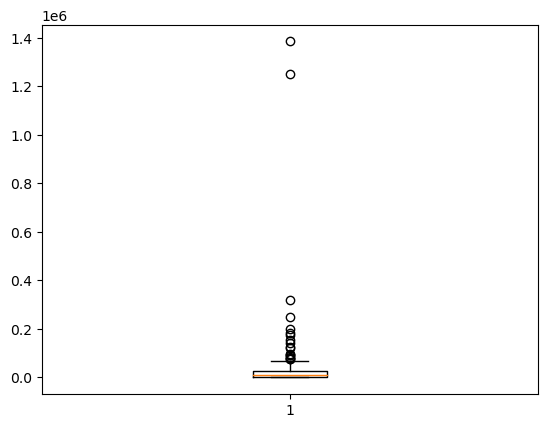

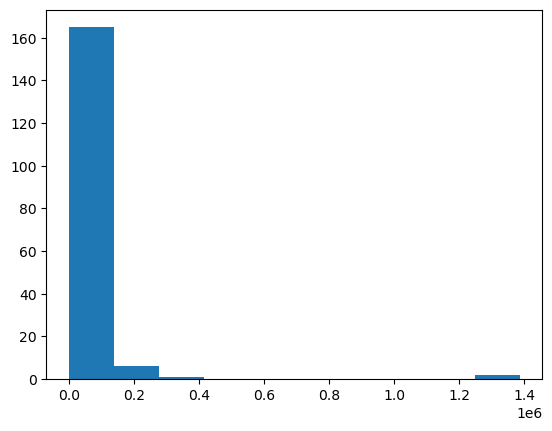

In [185]:
plt.boxplot(FAOSTAT_2013_population['Value'])
plt.show()
plt.hist(FAOSTAT_2013_population['Value'])
plt.show()

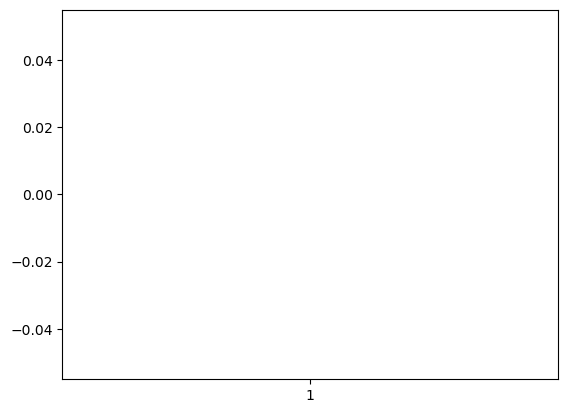

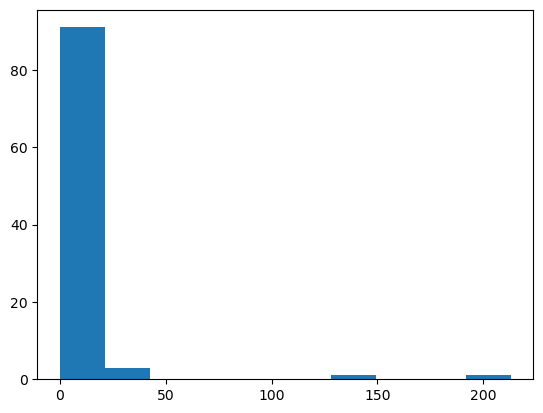

In [186]:
plt.boxplot(FAOSTAT_2013_sous_alimentation['Valeur'])
plt.show()
plt.hist(FAOSTAT_2013_sous_alimentation['Valeur'])
plt.show()

  • Analyses bi-variées

In [187]:
dp=FAOSTAT_2013_animal[FAOSTAT_2013_animal['Élément']=='Production']
dp=dp[dp['Produit']=='Crème'].sort_values('Produit')

fig = px.bar(x=dp.Valeur,y=dp.Pays,height=1000)
fig.show()


### 1 - Analyses descriptives et exploratoire des données

Il s’agit ici de réaliser des analyses descriptives statistiques et graphiques sur les différentes variables des jeux de données :
    • Analyses univariées
    • Analyses bi-variées
    • Analyses multi-variées
Réaliser également des analyses exploratoires sur les différentes variables

Il s’agit ici de répondre à toutes les questions ci-dessous.

#### Question 1 : Nombre d'humains sur la planète
Calculez le nombre total d’humains sur la planète.
Critiquez votre résultat. En cas d’anomalie, analysez et effectuer les corrections nécessaires.
Donnez le résultat de votre calcul pour l'année 2013.

In [188]:

#je calcule de nombre d'humain sans les lignes avec flag Aggregate

Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

FAOSTAT_2013_population.sort_values(by='Value', ascending=False, inplace=True )
fig = px.bar(x=FAOSTAT_2013_population.head(20).Country, y=FAOSTAT_2013_population.head(20).Value, height=1000)
fig.show()


fig = px.pie(values=FAOSTAT_2013_population.head(20).Value, names=FAOSTAT_2013_population.head(20).Country)
fig.show()

Le nombre d'humains sur la planète est: 6997326000


#### Question 2 : Redondances
Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique (pas besoin de coder ici).
C'est une équation à 3 termes de type (a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]) ) faisant intervenir chacune des 11 quantités données ci dessus.
Illustrez cette équation avec l'exemple du blé en France.

-Pour Les Data Animal, Cereal, Vegetal :

    Production + 'Importations - Quantité' + Variation de stock = 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité'

    'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement = 'Disponibilité intérieure'

    'Disponibilité intérieure' + 'Exportations - Quantité' = Production + 'Importations - Quantité' + Variation de stock
    Production + Importations - Exportations + Variation de stock= Disponibilité intérieure

In [189]:
#FAOSTAT_2013_vegetal

df_france=FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Pays']=='France']
df_france=df_france[df_france['Symbole']=='S']
df_france=df_france[df_france['Produit']=='Blé']


Production=df_france[df_france['Élément']=='Production']['Valeur'].sum()
Importations=df_france[df_france['Élément']=='Importations - Quantité']['Valeur'].sum()
Variation=df_france[df_france['Élément']=='Variation de stock']['Valeur'].sum()


Aliments_animaux=df_france[df_france['Élément']=='Aliments pour animaux']['Valeur'].sum()
Autres_Utilisations=df_france[df_france['Élément']=='Autres Utilisations']['Valeur'].sum()
Nourriture=df_france[df_france['Élément']=='Nourriture']['Valeur'].sum()
Pertes=df_france[df_france['Élément']=='Pertes']['Valeur'].sum()
Semences=df_france[df_france['Élément']=='Semences']['Valeur'].sum()
Traitement=df_france[df_france['Élément']=='Traitement']['Valeur'].sum()
Exportations=df_france[df_france['Élément']=='Exportations - Quantité']['Valeur'].sum()
Disponibilité=df_france[df_france['Élément']=='Disponibilité intérieure']['Valeur'].sum()

print(f"la somme de Production + Importations - Quantité' + Variation de stock est {Production+Importations+Variation}")

print(f"la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est {Aliments_animaux+Autres_Utilisations+Nourriture+Pertes+Semences+Traitement+Exportations}")

print(f"Production + Importations - Exportations + Variation de stock= {Production+Importations-Exportations+Variation }")
print(f"Disponibilité = {Disponibilité}")

la somme de Production + Importations - Quantité' + Variation de stock est 41800.0
la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est 41800.0
Production + Importations - Exportations + Variation de stock= 20298.0
Disponibilité = 20298.0


#### Question 3 : Disponibilité alimentaire (calories, protéines)
Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines. Vous ferez cela à partir de ces informations :
- Population de chaque pays
- Disponibilité alimentaire donnée pour chaque produit et pour chaque pays en kcal/personne/jour, -
- Disponibilité alimentaire en protéines donnée pour chaque produit et pour chaque pays en g/personne/jour.
Pour cette étape vous avez besoin de constituer une seule et même table à partir des tables animaux et végétaux.

In [190]:
#Population de chaque pays
dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000 

dPopulation

dPopulation.sort_values(by='Value', ascending=False, inplace=True )
fig = px.bar(x=dPopulation.head(10).Country,y=dPopulation.head(10).Value,height=1000)
fig.show()


C:\Users\MOHAM\AppData\Local\Temp\ipykernel_1536\630861171.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df = df[df['Élément']=='Disponibilité alimentaire (Kcal/personne/jour)']

merged_df = df.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(Kcal=merged_df['Valeur']*merged_df['Population']*365)
merged_df

m_df_kcal=merged_df[['Code Pays', "Pays", 'Population', 'Code Produit', 'Produit', "Kcal"]]
m_df_kcal

m_df_kcal=m_df_kcal[m_df_kcal['Produit']=='Blé']

m_df_kcal.sort_values(by='Kcal', ascending=False, inplace=True )
m_df_kcal.head(10)
fig = px.bar(x=m_df_kcal.head(10).Pays,y=m_df_kcal.head(10).Kcal, height=1000)
fig.show()

#m_df_kcal[m_df_kcal['Code Produit']=='2511']
#m_df_kcal_group=m_df_kcal.groupby(["Code Pays", "Pays", 'Produit']).sum()
#m_df_kcal_group

In [213]:
m_df_kcal

,Code Pays,Pays,Population,Code Produit,Produit,Kcal
2907,41,"Chine, continentale",1385567000,2511,Blé,2.776468e+14
6066,100,Inde,1252140000,2511,Blé,2.362851e+14
4417,231,États-Unis d'Amérique,320051000,2511,Blé,6.997435e+13
6154,101,Indonésie,249866000,2511,Blé,1.668980e+13
1964,21,Brésil,200362000,2511,Blé,2.808274e+13
...,...,...,...,...,...,...
7234,83,Kiribati,102000,2511,Blé,1.347726e+10
464,8,Antigua-et-Barbuda,90000,2511,Blé,1.635930e+10
3841,55,Dominique,72000,2511,Blé,1.377072e+10
1633,17,Bermudes,65000,2511,Blé,1.359442e+10


In [192]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df = df[df['Élément']=='Disponibilité de protéines en quantité (g/personne/jour)']

merged_df = df.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(protéinesKg=(merged_df['Valeur']/1000)*merged_df['Population']*365)
merged_df

m_df_protéinesKg=merged_df[['Code Pays', "Pays", 'Code Produit', 'Produit', "protéinesKg"]]

m_df_protéinesKg


#m_df_Kg_group=m_df_Kg.groupby(["Code Pays", "Pays", 'Produit']).sum()

#m_df_Kg_group

,Code Pays,Pays,Code Produit,Produit,protéinesKg
0,2,Afghanistan,2511,Blé,411601126.8
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0
2,2,Afghanistan,2513,Orge,8809669.2
3,2,Afghanistan,2514,Maïs,6244828.8
4,2,Afghanistan,2517,Millet,892118.4
...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5
11557,181,Zimbabwe,2765,Crustacés,0.0
11558,181,Zimbabwe,2766,Cephalopodes,0.0
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0


In [193]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df = df[df['Élément']=='Disponibilité alimentaire en quantité (kg/personne/an)']

merged_df = df.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(Kg=merged_df['Valeur']*merged_df['Population'])
merged_df

m_df_Kg=merged_df[['Code Pays', "Pays", 'Code Produit', 'Produit', "Kg"]]
m_df_Kg


#m_df_Kg_group=m_df_Kg.groupby(["Code Pays", "Pays", 'Produit']).sum()

#m_df_Kg_group

,Code Pays,Pays,Code Produit,Produit,Kg
0,2,Afghanistan,2511,Blé,4.895347e+09
1,2,Afghanistan,2805,Riz (Eq Blanchi),4.222286e+08
2,2,Afghanistan,2513,Orge,8.921184e+07
3,2,Afghanistan,2514,Maïs,7.638000e+07
4,2,Afghanistan,2517,Millet,1.222080e+07
...,...,...,...,...,...
14010,181,Zimbabwe,2764,"Poissons Marins, Autres",1.698000e+06
14011,181,Zimbabwe,2765,Crustacés,0.000000e+00
14012,181,Zimbabwe,2766,Cephalopodes,0.000000e+00
14013,181,Zimbabwe,2767,"Mollusques, Autres",1.415000e+05


#### Question 4 : Ratio énergie/poids
A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.

In [217]:
df_cal_g = m_df_kcal.merge(m_df_Kg, on=['Code Pays', 'Code Produit'])

df_cal_g=df_cal_g[(df_cal_g['Kcal']!=0)&(df_cal_g['Kg']!=0)] #supprimer les lignes avec valeurs = 0

df_cal_g= df_cal_g.assign(cal_g=df_cal_g['Kcal']/(df_cal_g['Kg']))
df_cal_g=df_cal_g[['Code Pays', 'Pays_x', 'Code Produit', 'Produit_x','Kcal', 'Kg','cal_g']]
df_cal_g.rename(columns={'Pays_x': 'Pays', 'Produit_x': 'Produit'}, inplace=True)
df_cal_g
#df_cal_g[(df_cal_g['Produit']=='Oeufs')].cal_g.hist()
#df_cal_g[(df_cal_g['Produit']=='Oeufs')]

,Code Pays,Pays,Code Produit,Produit,Kcal,Kg,cal_g
0,41,"Chine, continentale",2511,Blé,2.776468e+14,8.778953e+10,3162.642045
1,100,Inde,2511,Blé,2.362851e+14,7.582960e+10,3116.000661
2,231,États-Unis d'Amérique,2511,Blé,6.997435e+13,2.574170e+10,2718.326495
3,165,Pakistan,2511,Blé,6.003342e+13,2.069691e+10,2900.598434
4,185,Fédération de Russie,2511,Blé,5.328137e+13,1.870983e+10,2847.774639
...,...,...,...,...,...,...,...
169,8,Antigua-et-Barbuda,2511,Blé,1.635930e+10,5.585400e+06,2928.939736
170,55,Dominique,2511,Blé,1.377072e+10,5.132160e+06,2683.221100
171,17,Bermudes,2511,Blé,1.359442e+10,3.567200e+06,3810.951166
172,83,Kiribati,2511,Blé,1.347726e+10,4.961280e+06,2716.488487


,Code Pays,Pays,Code Produit,Produit,protéinesKg,Kg,protéines
3941,68,France,2511,Blé,6.098869e+08,6.971073e+09,0.087488


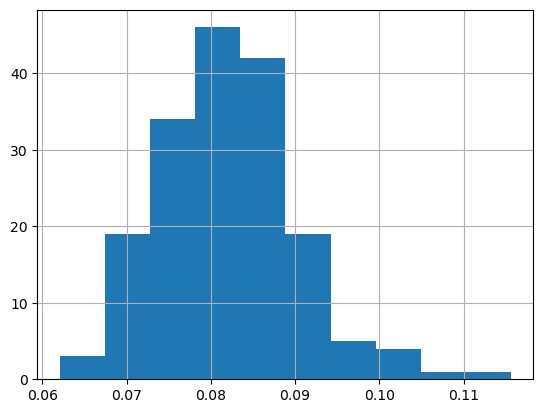

In [195]:
""""""""""""""""""""""""""""""""""""""""""""
#proteineparproduit

df_Pro_p = m_df_protéinesKg.merge(m_df_Kg, on=['Code Pays', 'Code Produit'])

df_Pro_p=df_Pro_p[(df_Pro_p['protéinesKg']!=0)&(df_Pro_p['Kg']!=0)]

df_Pro_p= df_Pro_p.assign(protéines=(df_Pro_p['protéinesKg']/df_Pro_p['Kg'])) #% de proteines
df_Pro_p=df_Pro_p[['Code Pays', 'Pays_x', 'Code Produit', 'Produit_x', 'protéinesKg', 'Kg', 'protéines']]
df_Pro_p.rename(columns={'Pays_x': 'Pays', 'Produit_x': 'Produit'}, inplace=True)

df_Pro_p[df_Pro_p['Produit']=='Blé'].protéines.hist()
df_Pro_p[(df_Pro_p['Produit']=='Blé') & (df_Pro_p['Pays']=='France')]

#### Question 5 : Aliments les plus caloriques et protéiques
En considérant les aliments végétaux et animaux, citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [196]:
df=df_cal_g[["Produit", "cal_g"]]
df=df.groupby(["Produit"]).quantile(0.5)

df = df.reset_index()

df.sort_values(by='cal_g', ascending=False, inplace=True )
fig = px.bar(x=df.head(20).Produit,y=df.head(20).cal_g,height=1000)
fig.show()
df.head(5)

,Produit,cal_g
0,Blé,2830.089993


#### Question 6 : Dispo. intérieure mondiale des végétaux
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [219]:

dfKcal=FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Élément']=='Disponibilité alimentaire (Kcal/personne/jour)']
dfKcal = dfKcal.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
dfKcal.rename(columns={'Value': 'Population'}, inplace=True)

dfKcal=dfKcal.assign(Kcal=dfKcal['Valeur']*dfKcal['Population']*365)

dfKcal=dfKcal[['Produit', 'Kcal']]
dfKcal=dfKcal.groupby("Produit", group_keys=False).sum()
dfKcal.sort_values('Kcal', ascending=False, inplace=True)
dfKcal = dfKcal.reset_index()
dfKcal['Kcal'].sum()
dfKcal



,Produit,Kcal
0,Riz (Eq Blanchi),1.381005e+15
1,Blé,1.345279e+15
2,Sucre Eq Brut,5.109690e+14
3,Maïs,3.766566e+14
4,Huile de Soja,2.103646e+14
...,...,...
69,Poivre,7.878098e+11
70,Girofles,4.482236e+10
71,Palmistes,3.416035e+10
72,"Sucre, betterave",2.873499e+10


In [220]:
dfKcal['Kcal'].sum()

6051609427075000.0

In [198]:
fig = px.bar(x=dfKcal.head(20).Produit,y=dfKcal.head(20).Kcal,height=1000)
fig.show()

#### Question 7 : Potentiel alimentaire des végétaux
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [199]:
dfprotéines=FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Élément']=='Disponibilité de protéines en quantité (g/personne/jour)']
dfprotéines = dfprotéines.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
dfprotéines.rename(columns={'Value': 'Population'}, inplace=True)

dfprotéines=dfprotéines.assign(kg=(dfprotéines['Valeur']/1000)*dfprotéines['Population']*365) 

dfprotéines=dfprotéines[['Produit', 'kg']]
dfprotéines=dfprotéines.groupby("Produit", group_keys=False).sum()
dfprotéines.sort_values('kg', ascending=False, inplace=True)
dfprotéines = dfprotéines.reset_index()

fig = px.bar(x=dfprotéines.head(20).Produit,y=dfprotéines.head(20).kg,height=1000)
fig.show()

dfprotéines

,Produit,kg
0,Blé,4.054187e+10
1,Riz (Eq Blanchi),2.588328e+10
2,"Légumes, Autres",1.010774e+10
3,Maïs,9.152925e+09
4,Légumineuses Autres,5.747362e+09
...,...,...
68,Vin,1.934500e+03
69,Graines de coton,0.000000e+00
70,Huile de Sésame,0.000000e+00
71,Palmistes,0.000000e+00


In [200]:
'''
Pour un homme : 2500 kcal/jourx365 jours/an=912500 kcal/an
Pour une femme : 2000 kcal/jourx365 jours/an=730000 kcal/an
https://www.webmd.com/diet/calories-chart

Les experts recommandent 75 à 100 grammes de protéines par jour
https://www.health.harvard.edu/blog/how-much-protein-do-you-need-every-day-201506188096
'''

Kcal_monde=dfKcal.Kcal.sum()
kg_monde=dfprotéines.kg.sum()
Totalpopulation=float(Totalpopulation)
besionKcal=2500*365
besion_protéines_kg=(75/1000)*365

print(f"la valeur energitique vegetale monde est :{Kcal_monde.round(2)} kcal")
print(f"les protéines vegetale monde est :{kg_monde.round(2)} kg")

print(f"les besoin humain monde :{Totalpopulation*besionKcal} kcal")
print(f"les besoin humain monde en protéines :{Totalpopulation*besion_protéines_kg} kg")



population_cal=Kcal_monde/besionKcal
population_kg=kg_monde/besion_protéines_kg

population_cal= population_cal/Totalpopulation*100
population_kg= population_kg/Totalpopulation*100

print(f"la population cal :{population_cal.round(2)}%")
print(f"la population kg :{population_kg.round(2)}%")

la valeur energitique vegetale monde est :6051609427075000.0 kcal
les protéines vegetale monde est :125201642514.55 kg
les besoin humain monde :6385059975000000.0 kcal
les besoin humain monde en protéines :191551799250.0 kg
la population cal :94.78%
la population kg :65.36%


#### Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)
Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [201]:
df=FAOSTAT_2013_vegetal
df=df.loc[(df['Élément']=='Nourriture') | (df['Élément']=="Aliments pour animaux") | (df['Élément']=="Pertes")]

def Calcule_Total(df_filtre):
    group_df=df_filtre[['Pays', 'Produit', 'Valeur']].groupby(['Pays', 'Produit'],as_index=False).sum()

    group_df=group_df.merge(df_Pro_p, on=[ 'Pays', 'Produit'])
    group_df=group_df[['Pays', 'Produit', 'Valeur', 'protéines']]

    group_df=group_df.merge(df_cal_g, on=[ 'Pays', 'Produit'])
    group_df=group_df[['Pays', 'Produit', 'Valeur', 'protéines', 'cal_g']]

    group_df=group_df.assign(totalproteinesKg=(group_df['Valeur']*1000*1000)*group_df['protéines'])

    group_df=group_df.assign(totalcalKcal=(group_df['Valeur']*1000*1000)*group_df['cal_g'])


    group_df[(group_df['Pays']=='France') & (group_df['Produit']=='Blé')]

    return group_df['totalproteinesKg'].sum(), group_df['totalcalKcal'].sum()


def Totalprint (totalproteinesKg_mode, totalcalKcal_mode):
    
    print(f"La production de calories mondiale est : {totalcalKcal_mode}Kcal")

    print(f"La production de proteines mondiale est : {totalproteinesKg_mode}Kg")

    print(f"Les humains qui peuvent vivre avec les calories mondiale est : {((totalcalKcal_mode/besionKcal)/Totalpopulation)*100} %")
    print(f"Les humains qui peuvent vivre avec les proteines mondiale est : {((totalproteinesKg_mode/besion_protéines_kg)/Totalpopulation)*100} %")
 

totalproteinesKg_mode, totalcalKcal_mode = Calcule_Total(df)
print("-------------vegetal------------------")
Totalprint(totalproteinesKg_mode, totalcalKcal_mode)



-------------vegetal------------------
La production de calories mondiale est : 1798806907361941.0Kcal
La production de proteines mondiale est : 54561316747.52362Kg
Les humains qui peuvent vivre avec les calories mondiale est : 28.172122335654976 %
Les humains qui peuvent vivre avec les proteines mondiale est : 28.483844558574994 %


#### Question 9 : Potentiel alimentaire de la dispo. Mondiale
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [202]:
df=m_df_Kg.rename(columns={'Kg': 'Valeur'})
df

,Code Pays,Pays,Code Produit,Produit,Valeur
0,2,Afghanistan,2511,Blé,4.895347e+09
1,2,Afghanistan,2805,Riz (Eq Blanchi),4.222286e+08
2,2,Afghanistan,2513,Orge,8.921184e+07
3,2,Afghanistan,2514,Maïs,7.638000e+07
4,2,Afghanistan,2517,Millet,1.222080e+07
...,...,...,...,...,...
14010,181,Zimbabwe,2764,"Poissons Marins, Autres",1.698000e+06
14011,181,Zimbabwe,2765,Crustacés,0.000000e+00
14012,181,Zimbabwe,2766,Cephalopodes,0.000000e+00
14013,181,Zimbabwe,2767,"Mollusques, Autres",1.415000e+05


In [203]:
totalproteinesKg_mode, totalcalKcal_mode = Calcule_Total(df)
print("-------------Disponibilité alimentaire------------------")
Totalprint(totalproteinesKg_mode, totalcalKcal_mode)

-------------Disponibilité alimentaire------------------
La production de calories mondiale est : 1.34527911519e+21Kcal
La production de proteines mondiale est : 4.054187298995e+16Kg
Les humains qui peuvent vivre avec les calories mondiale est : 21069169.59993003 %
Les humains qui peuvent vivre avec les proteines mondiale est : 21164965.898878135 %


#### Question 10 : Proportion de la sous-nutrition mondiale
A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [204]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df=FAOSTAT_2013_sous_alimentation
mask = df['Symbole'].str.contains('<')
df.loc[mask, 'Valeur'] = df.loc[mask, 'Symbole'].str.replace('<', '').astype(float)


df = FAOSTAT_2013_sous_alimentation.merge(dPopulation, left_on='Code zone', right_on='Country Code')

df.rename(columns={'Value': 'Population'}, inplace=True)
df=df[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

      
df=df.assign(proportion=df['Valeur']*1e6/df['Population']*100)
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100

print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')
Sous_alimentation=df
Sous_alimentation


la proportion de la population mondiale considérée comme en sous-nutrition est 11.2%


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
0,2,Afghanistan,8.1,F,Estimation FAO,30552000,26.512176
1,202,Afrique du Sud,2.6,F,Estimation FAO,52776000,4.926482
2,3,Albanie,0.2,F,Estimation FAO,3173000,6.303183
3,4,Algérie,1.8,F,Estimation FAO,39208000,4.590900
4,79,Allemagne,2.0,<2,Moins de 2 millions de personnes sont sous-ali...,82727000,2.417590
...,...,...,...,...,...,...,...
161,236,Venezuela (République bolivarienne du),1.8,F,Estimation FAO,30405000,5.920079
162,237,Viet Nam,11.1,F,Estimation FAO,91680000,12.107330
163,249,Yémen,7.1,F,Estimation FAO,24407000,29.090015
164,251,Zambie,7.0,F,Estimation FAO,14539000,48.146365


#### Question 11 : Céréales
Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

-Pour Les Data Animal, Cereal, Vegetal :

    Production + 'Importations - Quantité' + Variation de stock = 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité'

    'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement = 'Disponibilité intérieure'

    'Disponibilité intérieure' + 'Exportations - Quantité' = Production + 'Importations - Quantité' + Variation de stock

In [205]:
cereal=FAOSTAT_2013_cereal
 
cereal=cereal.loc[(cereal['Élément']=='Aliments pour animaux') | (cereal['Élément']=='Nourriture')]
cereal=cereal[['Code Produit', 'Produit', 'Élément','Valeur']]
groupe_cereal=cereal.groupby(['Code Produit','Produit', 'Élément'],as_index=False).sum()

g_cereal = groupe_cereal.pivot(index=['Code Produit', 'Produit'], columns='Élément', values='Valeur').reset_index()
g_cereal=g_cereal.assign(proportion_animale=g_cereal['Aliments pour animaux']/(g_cereal['Aliments pour animaux']+g_cereal['Nourriture'])*100)

proportion_animale=g_cereal['proportion_animale'].mean()
proportion_animale

54.03447023969349

#### Question 12 : Sous-nutrition
Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.
Repérez les 15 produits les plus exportés par ce groupe de pays.
Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné).
Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

    • le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
    • le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)
    
Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

#### Question 13 : USA
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [206]:
usa=FAOSTAT_2013_cereal
usa=usa.loc[(usa['Pays']=="États-Unis d'Amérique")&(usa['Élément']=="Aliments pour animaux")]
usa=usa[['Code Produit', 'Produit', 'Unité', 'Valeur']]
usa=usa.assign(Valeur_10_tonne=(usa['Valeur']*0.1)*1000)
print(f"10% de la production de produits animaux est: {usa['Valeur_10_tonne'].sum().round(2) } Tonnes")
usa

10% de la production de produits animaux est: 14009600.0 Tonnes


,Code Produit,Produit,Unité,Valeur,Valeur_10_tonne
4902,2511,Blé,Milliers de tonnes,6196.0,619600.0
4930,2513,Orge,Milliers de tonnes,1440.0,144000.0
4944,2514,Maïs,Milliers de tonnes,128024.0,12802400.0
4958,2515,Seigle,Milliers de tonnes,184.0,18400.0
4971,2516,Avoine,Milliers de tonnes,1430.0,143000.0
4982,2517,Millet,Milliers de tonnes,394.0,39400.0
4989,2518,Sorgho,Milliers de tonnes,2351.0,235100.0
5002,2520,"Céréales, Autres",Milliers de tonnes,77.0,7700.0


#### Question 14 : Thaïlande
En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [212]:
Tai=FAOSTAT_2013_vegetal
Tai=Tai.loc[(Tai['Pays']=="Thaïlande")&(Tai['Produit']=="Manioc")]
export=Tai[Tai['Élément']=="Exportations - Quantité"].Valeur.sum()*1000
production=Tai[Tai['Élément']=="Production"].Valeur.sum()*1000
print(f"la Proportion de manioc exportée est {(export/(production)*100).round(2)} %")

sous_nutrition=Sous_alimentation.loc[Sous_alimentation['Zone']=="Thaïlande", 'proportion'].values[0]
print(f"la proportion de personnes en sous-nutrition est: {sous_nutrition.round(2)} %")
Tai

la Proportion de manioc exportée est 83.41 %
la proportion de personnes en sous-nutrition est: 9.1 %


,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
95538,FBS,Bilans Alimentaires,216,Thaïlande,5511,Production,2532,Manioc,2013,2013,Milliers de tonnes,30228.00,S,Données standardisées
95539,FBS,Bilans Alimentaires,216,Thaïlande,5611,Importations - Quantité,2532,Manioc,2013,2013,Milliers de tonnes,1250.00,S,Données standardisées
95540,FBS,Bilans Alimentaires,216,Thaïlande,5072,Variation de stock,2532,Manioc,2013,2013,Milliers de tonnes,0.00,S,Données standardisées
95541,FBS,Bilans Alimentaires,216,Thaïlande,5911,Exportations - Quantité,2532,Manioc,2013,2013,Milliers de tonnes,25214.00,S,Données standardisées
95542,FBS,Bilans Alimentaires,216,Thaïlande,5301,Disponibilité intérieure,2532,Manioc,2013,2013,Milliers de tonnes,6264.00,S,Données standardisées
95543,FBS,Bilans Alimentaires,216,Thaïlande,5521,Aliments pour animaux,2532,Manioc,2013,2013,Milliers de tonnes,1800.00,S,Données standardisées
95544,FBS,Bilans Alimentaires,216,Thaïlande,5123,Pertes,2532,Manioc,2013,2013,Milliers de tonnes,1511.00,S,Données standardisées
95545,FBS,Bilans Alimentaires,216,Thaïlande,5131,Traitement,2532,Manioc,2013,2013,Milliers de tonnes,0.00,S,Données standardisées
95546,FBS,Bilans Alimentaires,216,Thaïlande,5154,Autres Utilisations,2532,Manioc,2013,2013,Milliers de tonnes,2081.00,S,Données standardisées
95547,FBS,Bilans Alimentaires,216,Thaïlande,5142,Nourriture,2532,Manioc,2013,2013,Milliers de tonnes,871.00,S,Données standardisées


### 3 - Etude guidée n°2

Il s’agit ici d’intégrer toutes les données dans une base de données relationnelle puis de répondre à toutes les questions ci-dessous.
La base de données contiendra 4 tables : population, dispo_alim, equilibre_prod, sous_nutrition.

#### Question 15 : Table population
Définir une clé primaire pertinente pour la table population. Intégrer la table dans la base de données relationnelle.

#### Question 16 : Table dispo_alim
La table appelée dispo_alim contient pour chaque pays, pour chaque produit, sur l'année 2013, les informations suivantes:
- la nature du produit (deux valeurs possibles“animal” ou “végétal”)
- disponibilité alimentaire en tonnes
- disponibilité alimentaire en Kcal/personne/jour
- disponibilité alimentaire de protéines en g/personne/jour
- disponibilité alimentaire de matières grasses en g/personne/jour
La table contient ces colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .
Définir une clé primaire pertinente pour la table dispo_alim. Intégrer la table dans la base de données relationnelle.

#### Question 17 : Table equilibre_prod
La table appelée equilibre_prod contient pour chaque pays, pour chaque produit, et pour l'année disponible 2013, les quantités suivantes :
- disponibilité intérieure
- aliments pour animaux
- semences
- pertes
- transformés
- nourriture
- autres utilisations
Elle contient ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.
Définir une clé primaire pertinente pour la table equilibre_prod. Intégrer la table dans la base de données relationnelle.

#### Question 18 : Table sous_nutrition
La table appelée sous_nutrition, contient le nombre de personnes en sous-alimentation pour chaque pays et pour chaque année. Elle contient 4 colonnes : pays, code_pays, année, nb_personnes.
Définir une clé primaire pertinente pour la table sous_nutrition. Intégrer la table dans la base de données relationnelle.

#### Question 19 : Requêtes SQL
Formuler les requêtes SQL pour répondre aux questions suivantes :
    • Quels sont les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant ?
    • Quels sont les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant ?
    • Quelle est la quantité totale (en kg) de produits perdus par pays?
    • Quels sont les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte ?
    • Quels sont les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé ?

#### Question 20 : Autres utilisations des produits
Pour quelques-uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur internet !).

### 4 - Analyses complémentaire

Fort de votre expérience de Data Analyst, il s’agit maintenant de réaliser vos propres analyses et exploration.